In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

In [2]:
# Create a df with holidays
from workalendar.europe import Belgium
cal = Belgium()
years = list(range(2014, 2021))
holidays = []
for year in years:
    holidays.extend(cal.holidays(year))
holidays

[(datetime.date(2014, 1, 1), 'New year'),
 (datetime.date(2014, 4, 21), 'Easter Monday'),
 (datetime.date(2014, 5, 1), 'Labour Day'),
 (datetime.date(2014, 5, 29), 'Ascension Thursday'),
 (datetime.date(2014, 6, 9), 'Whit Monday'),
 (datetime.date(2014, 7, 21), 'National Day'),
 (datetime.date(2014, 8, 15), 'Assumption of Mary to Heaven'),
 (datetime.date(2014, 11, 1), 'All Saints Day'),
 (datetime.date(2014, 11, 11), 'Armistice of 1918'),
 (datetime.date(2014, 12, 25), 'Christmas Day'),
 (datetime.date(2015, 1, 1), 'New year'),
 (datetime.date(2015, 4, 6), 'Easter Monday'),
 (datetime.date(2015, 5, 1), 'Labour Day'),
 (datetime.date(2015, 5, 14), 'Ascension Thursday'),
 (datetime.date(2015, 5, 25), 'Whit Monday'),
 (datetime.date(2015, 7, 21), 'National Day'),
 (datetime.date(2015, 8, 15), 'Assumption of Mary to Heaven'),
 (datetime.date(2015, 11, 1), 'All Saints Day'),
 (datetime.date(2015, 11, 11), 'Armistice of 1918'),
 (datetime.date(2015, 12, 25), 'Christmas Day'),
 (datetime.dat

In [3]:
data1 = pd.read_pickle('Building-1-Roulart Media Group/building_1_cnsumptions.pkl')
data1.index = pd.to_datetime(data1.index)
data1['Datetime'] = data1.index
data1

,Valeur,Datetime
Date,,
2014-01-06 02:00:00,6.51,2014-01-06 02:00:00
2014-01-06 02:15:00,6.51,2014-01-06 02:15:00
2014-01-06 02:30:00,6.72,2014-01-06 02:30:00
2014-01-06 02:45:00,6.51,2014-01-06 02:45:00
2014-01-06 03:00:00,6.93,2014-01-06 03:00:00
...,...,...
2020-06-30 23:00:00,5.04,2020-06-30 23:00:00
2020-06-30 23:15:00,3.36,2020-06-30 23:15:00
2020-06-30 23:30:00,3.36,2020-06-30 23:30:00


In [4]:
# Making sure there are no duplicated data
# If there are some duplicates we average the data during those duplicated days
data1 = data1.groupby('Datetime', as_index=False)['Valeur'].mean()

# Sorting the values
data1['Datetime'] = pd.to_datetime(data1['Datetime'])
data1 = data1.loc[data1['Datetime'] < '2020']
data1 = data1.sort_values('Datetime')
data1

,Datetime,Valeur
0,2014-01-06 02:00:00,6.51
1,2014-01-06 02:15:00,6.51
2,2014-01-06 02:30:00,6.72
3,2014-01-06 02:45:00,6.51
4,2014-01-06 03:00:00,6.93
...,...,...
195807,2019-12-31 22:45:00,3.78
195808,2019-12-31 23:00:00,3.99
195809,2019-12-31 23:15:00,3.78
195810,2019-12-31 23:30:00,3.78


In [5]:
data1 = data1.set_index('Datetime') 

In [6]:
upsampled = data1.resample('15T').mean()
upsampled['2014-01-15':'2014-01-30']

,Valeur
Datetime,
2014-01-15 00:00:00,NaN
2014-01-15 00:15:00,NaN
2014-01-15 00:30:00,NaN
2014-01-15 00:45:00,NaN
2014-01-15 01:00:00,NaN
...,...
2014-01-30 22:45:00,NaN
2014-01-30 23:00:00,NaN
2014-01-30 23:15:00,NaN


In [7]:
upsampled['2014-12-06':'2015'].isna().sum() 

Valeur    4
dtype: int64

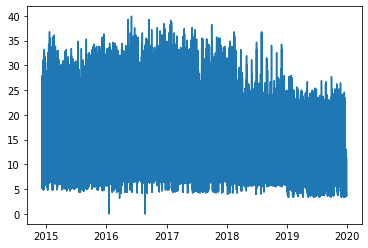

In [8]:
fix, ax = plt.subplots()
ax.plot(upsampled['2014-12-06':])

In [9]:
dataplus = upsampled['2014-12-06':][:]
dataplus.head()

,Valeur
Datetime,
2014-12-06 00:00:00,7.14
2014-12-06 00:15:00,7.56
2014-12-06 00:30:00,6.72
2014-12-06 00:45:00,6.93
2014-12-06 01:00:00,7.14


In [10]:
dataplus = dataplus.fillna(method='ffill')
dataplus.to_csv('./Consumption_15min.csv')
dataplus.tail()

,Valeur
Datetime,
2019-12-31 22:45:00,3.78
2019-12-31 23:00:00,3.99
2019-12-31 23:15:00,3.78
2019-12-31 23:30:00,3.78
2019-12-31 23:45:00,3.78


In [11]:
dataplus['working day'] = dataplus.index.map(cal.is_working_day)
dataplus.head()

,Valeur,working day
Datetime,,
2014-12-06 00:00:00,7.14,False
2014-12-06 00:15:00,7.56,False
2014-12-06 00:30:00,6.72,False
2014-12-06 00:45:00,6.93,False
2014-12-06 01:00:00,7.14,False


In [12]:
#dataplus_save = dataplus.drop('date', axis=1)
dataplus_save.to_pickle('./building1_holidays_nogaps.pkl')
dataplus_save.tail()

NameError: name 'dataplus_save' is not defined

In [13]:
weather_rad = pd.read_csv('./weather_data/50.80_4.30_radiation.csv', parse_dates=[0])
weather_temp = pd.read_csv('./weather_data/50.80_4.30_temp.csv', parse_dates=[0])
weather_wind = pd.read_csv('./weather_data/50.80_4.30_wind_speed_10m.csv', parse_dates=[0])

In [14]:
weather_temp

,time,Temperatures (°C)
0,2014-01-01 00:00:00,6.543848
1,2014-01-01 01:00:00,6.463861
2,2014-01-01 02:00:00,6.093958
3,2014-01-01 03:00:00,5.770258
4,2014-01-01 04:00:00,5.348657
...,...,...
52579,2019-12-31 19:00:00,4.495996
52580,2019-12-31 20:00:00,4.333765
52581,2019-12-31 21:00:00,3.941431
52582,2019-12-31 22:00:00,3.519647


In [15]:
temp_save = weather_temp.loc[weather_temp['time']>='2014-12-06'][:]
temp_save['time'] = pd.to_datetime(temp_save['time'])
temp_save = temp_save.set_index(['time'])
temp_save = temp_save.resample('15T').pad()
temp_save 

,Temperatures (°C)
time,
2014-12-06 00:00:00,4.265863
2014-12-06 00:15:00,4.265863
2014-12-06 00:30:00,4.265863
2014-12-06 00:45:00,4.265863
2014-12-06 01:00:00,4.289362
...,...
2019-12-31 22:00:00,3.519647
2019-12-31 22:15:00,3.519647
2019-12-31 22:30:00,3.519647


In [16]:
temp_save = temp_save.reindex(dataplus.index)
temp_save = temp_save.fillna(method='ffill')
temp_save.to_csv('./Temp_15min.csv')

In [17]:
weather = weather_temp.merge(weather_rad, on='time', how='left')
weather = weather.merge(weather_wind, on='time', how='left')
weather

,time,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s)
0,2014-01-01 00:00:00,6.543848,0.0,1.768800
1,2014-01-01 01:00:00,6.463861,0.0,1.742060
2,2014-01-01 02:00:00,6.093958,0.0,1.783930
3,2014-01-01 03:00:00,5.770258,0.0,1.796773
4,2014-01-01 04:00:00,5.348657,0.0,1.867476
...,...,...,...,...
52579,2019-12-31 19:00:00,4.495996,0.0,1.352552
52580,2019-12-31 20:00:00,4.333765,0.0,1.268483
52581,2019-12-31 21:00:00,3.941431,0.0,1.157690
52582,2019-12-31 22:00:00,3.519647,0.0,1.106620


In [18]:
weather['time'] = pd.to_datetime(weather['time'])
weather = weather.set_index(['time'])
weather.tail()

,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s)
time,,,
2019-12-31 19:00:00,4.495996,0.0,1.352552
2019-12-31 20:00:00,4.333765,0.0,1.268483
2019-12-31 21:00:00,3.941431,0.0,1.157690
2019-12-31 22:00:00,3.519647,0.0,1.106620
2019-12-31 23:00:00,2.955377,0.0,1.059723


In [19]:
weather15 = weather.resample('15T').pad()
weather15

,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s)
time,,,
2014-01-01 00:00:00,6.543848,0.0,1.768800
2014-01-01 00:15:00,6.543848,0.0,1.768800
2014-01-01 00:30:00,6.543848,0.0,1.768800
2014-01-01 00:45:00,6.543848,0.0,1.768800
2014-01-01 01:00:00,6.463861,0.0,1.742060
...,...,...,...
2019-12-31 22:00:00,3.519647,0.0,1.106620
2019-12-31 22:15:00,3.519647,0.0,1.106620
2019-12-31 22:30:00,3.519647,0.0,1.106620


In [20]:
data_B1 = dataplus.merge(weather15, left_on='Datetime', right_on='time', how='left', right_index=True)
data_B1

,Valeur,working day,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s)
Datetime,,,,,
2014-12-06 00:00:00,7.14,False,4.265863,0.0,0.921717
2014-12-06 00:15:00,7.56,False,4.265863,0.0,0.921717
2014-12-06 00:30:00,6.72,False,4.265863,0.0,0.921717
2014-12-06 00:45:00,6.93,False,4.265863,0.0,0.921717
2014-12-06 01:00:00,7.14,False,4.289362,0.0,0.930137
...,...,...,...,...,...
2019-12-31 22:45:00,3.78,True,3.519647,0.0,1.106620
2019-12-31 23:00:00,3.99,True,2.955377,0.0,1.059723
2019-12-31 23:15:00,3.78,True,NaN,NaN,NaN


In [21]:
# we encode cynical data into two dimensions using a sine and cosine transformations
data_B1['hour of day'] = data_B1.index.hour
data_B1['day of week'] = data_B1.index.dayofweek
data_B1['month'] = data_B1.index.month
data_B1['minutes'] = data_B1.index.minute
data_B1.head()

,Valeur,working day,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s),hour of day,day of week,month,minutes
Datetime,,,,,,,,,
2014-12-06 00:00:00,7.14,False,4.265863,0.0,0.921717,0,5,12,0
2014-12-06 00:15:00,7.56,False,4.265863,0.0,0.921717,0,5,12,15
2014-12-06 00:30:00,6.72,False,4.265863,0.0,0.921717,0,5,12,30
2014-12-06 00:45:00,6.93,False,4.265863,0.0,0.921717,0,5,12,45
2014-12-06 01:00:00,7.14,False,4.289362,0.0,0.930137,1,5,12,0


In [22]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
data_B1 = encode(data_B1, 'hour of day', 23)
data_B1 = encode(data_B1, 'day of week', 6)
data_B1 = encode(data_B1, 'month', 12)
data_B1 = encode(data_B1, 'minutes', 60)
data_B1.head()

,Valeur,working day,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s),hour of day,day of week,month,minutes,hour of day_sin,hour of day_cos,day of week_sin,day of week_cos,month_sin,month_cos,minutes_sin,minutes_cos
Datetime,,,,,,,,,,,,,,,,,
2014-12-06 00:00:00,7.14,False,4.265863,0.0,0.921717,0,5,12,0,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00
2014-12-06 00:15:00,7.56,False,4.265863,0.0,0.921717,0,5,12,15,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,1.000000e+00,2.832769e-16
2014-12-06 00:30:00,6.72,False,4.265863,0.0,0.921717,0,5,12,30,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,5.665539e-16,-1.000000e+00
2014-12-06 00:45:00,6.93,False,4.265863,0.0,0.921717,0,5,12,45,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16
2014-12-06 01:00:00,7.14,False,4.289362,0.0,0.930137,1,5,12,0,0.269797,0.962917,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00


In [23]:
data_B1_save = data_B1.fillna(method='ffill')

In [25]:
data_B1_save.to_csv('dataB1_weather&holidays.csv')
data_B1_save.head()

,Valeur,working day,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s),hour of day,day of week,month,minutes,hour of day_sin,hour of day_cos,day of week_sin,day of week_cos,month_sin,month_cos,minutes_sin,minutes_cos
Datetime,,,,,,,,,,,,,,,,,
2014-12-06 00:00:00,7.14,False,4.265863,0.0,0.921717,0,5,12,0,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00
2014-12-06 00:15:00,7.56,False,4.265863,0.0,0.921717,0,5,12,15,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,1.000000e+00,2.832769e-16
2014-12-06 00:30:00,6.72,False,4.265863,0.0,0.921717,0,5,12,30,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,5.665539e-16,-1.000000e+00
2014-12-06 00:45:00,6.93,False,4.265863,0.0,0.921717,0,5,12,45,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16
2014-12-06 01:00:00,7.14,False,4.289362,0.0,0.930137,1,5,12,0,0.269797,0.962917,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00


In [26]:
holidata = pd.read_csv('./dataB1_weather&holidays_nogaps.csv', index_col=0)
holidata.head()

,Valeur,working day,Temperatures (°C),Radiation (Wh/m²),Wind speed (m/s),hour of day,day of week,month,minutes,hour of day_sin,hour of day_cos,day of week_sin,day of week_cos,month_sin,month_cos,minutes_sin,minutes_cos
Datetime,,,,,,,,,,,,,,,,,
2014-12-06 00:00:00,7.14,False,4.265863,0.0,0.921717,0,5,12,0,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00
2014-12-06 00:15:00,7.56,False,4.265863,0.0,0.921717,0,5,12,15,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,1.000000e+00,2.832769e-16
2014-12-06 00:30:00,6.72,False,4.265863,0.0,0.921717,0,5,12,30,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,5.665539e-16,-1.000000e+00
2014-12-06 00:45:00,6.93,False,4.265863,0.0,0.921717,0,5,12,45,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16
2014-12-06 01:00:00,7.14,False,4.289362,0.0,0.930137,1,5,12,0,0.269797,0.962917,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00
